# Unidad 4 - Python avanzado

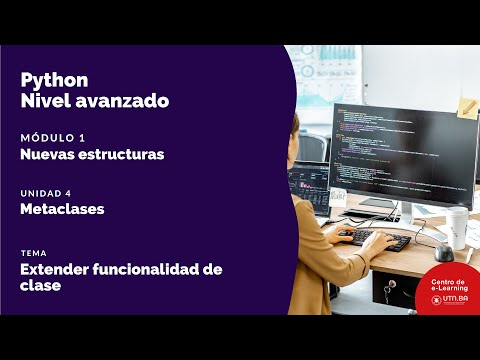

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('jL4kdlVxIhM' , width=700, height=300)

### Ejemplo de uso de metaclase

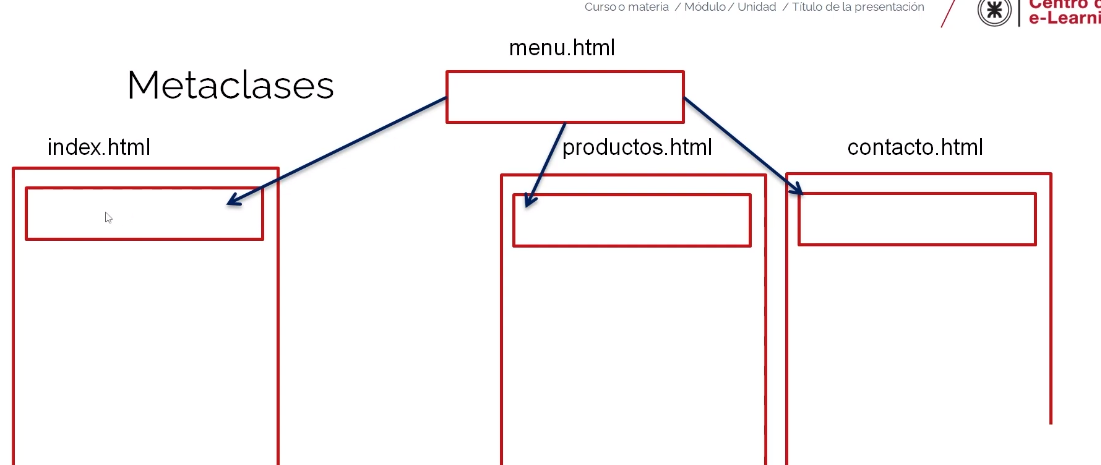

### Ejemplo de cómo extender clase

In [2]:
def extender_clase(self, arg):
    print(arg)

class MiClase(): pass

MiClase.extender_clase = extender_clase

obj = MiClase()
obj.extender_clase("Este método se ha agregado a la clase")


Este metodo se ha agregado a la clase


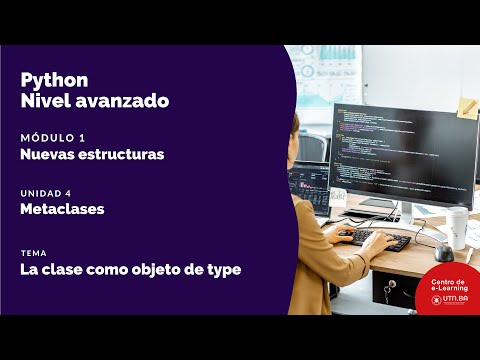

In [7]:
from IPython.display import YouTubeVideo

YouTubeVideo('-a38Uhk6Xp0' , width=700, height=300)

In [15]:
class Material: pass

class Auto(Material): 
    color = "azul"

    def retornar_color(self,):
        return self.color

obj = Auto()
print(obj.retornar_color())
print(type(Auto.__class__))

print("---"*23)

# declarando una clase EXPLICITAMENTE
Auto2=type("Auto2", (Material,), {"color": "rojo", "retornar_color":(lambda x:x.color)})
obj2 = Auto2()
print(obj2.retornar_color())
print(type(Auto2.__class__))

azul
<class 'type'>
---------------------------------------------------------------------
rojo
<class 'type'>


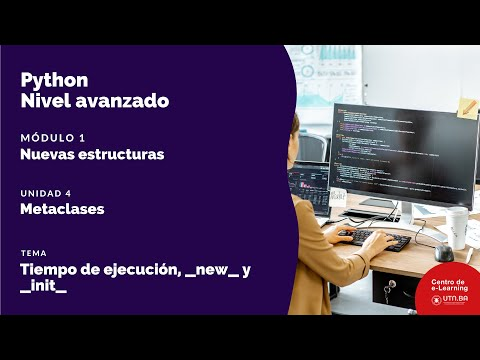

In [16]:
from IPython.display import YouTubeVideo

YouTubeVideo('x0n4Bg0iV5c' , width=700, height=300)

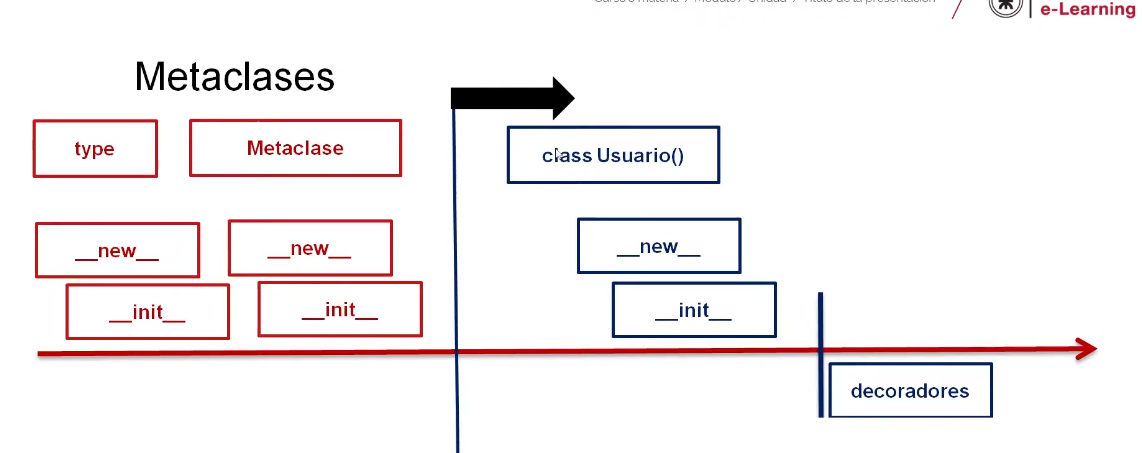

In [6]:
# metaclase
# metaclase hereda de type

class MiMetaClase(type):
    def __new__(meta, nombre_de_clase, superclase, diccionario_de_clase):
        print("En __new__ de metaclase:" , meta, nombre_de_clase, superclase, diccionario_de_clase, sep="\n..." )
        return type.__new__(meta, nombre_de_clase, superclase, diccionario_de_clase) 

    def __init__(Clase, nombre_de_clase, superclase, diccionario_de_clase):
        print("En __init__ de metaclase:" , Clase, nombre_de_clase, superclase, diccionario_de_clase, sep="\n..." )
        print("...init obj de clase", list(Clase.__dict__.keys()))
        
class MiSuperClase(): pass

class MiClase(MiSuperClase, metaclass=MiMetaClase):  
    atributo=1
    def metodo1(self, arg):
        return self.atributo+3*arg 

# class MiClase2(MiSuperClase, metaclass=MiMetaClase):  
#     atributo2=1
#     def metodo1(self, arg):
#         return self.atributo2+3*arg 


print("Creando una instancia")

x = MiClase()
print("atributo:", x.atributo, x.metodo1(7))

En __new__ de metaclase:
...<class '__main__.MiMetaClase'>
...MiClase
...(<class '__main__.MiSuperClase'>,)
...{'__module__': '__main__', '__qualname__': 'MiClase', 'atributo': 1, 'metodo1': <function MiClase.metodo1 at 0x000001356BDFD620>}
En __init__ de metaclase:
...<class '__main__.MiClase'>
...MiClase
...(<class '__main__.MiSuperClase'>,)
...{'__module__': '__main__', '__qualname__': 'MiClase', 'atributo': 1, 'metodo1': <function MiClase.metodo1 at 0x000001356BDFD620>}
...init obj de clase ['__module__', 'atributo', 'metodo1', '__doc__']
Creando una instancia
atributo: 1 22


## Acceso a atributos y a métodos de metaclases

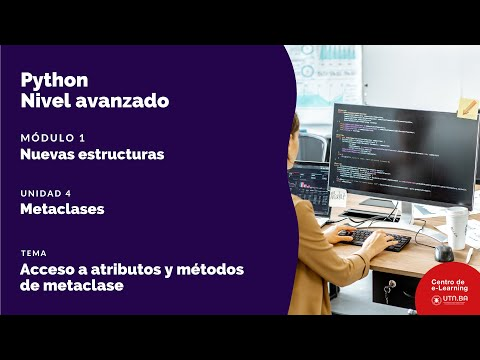

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('-0iOfKKGHFs' , width=700, height=300)


## Métodos de atributos de instancias desde metaclase

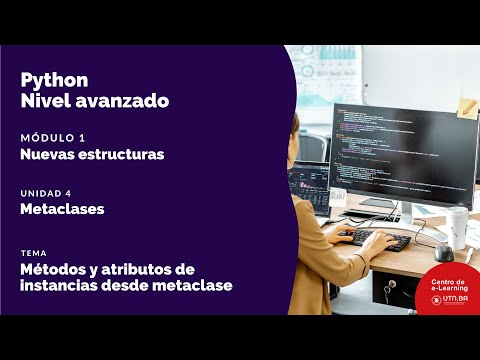

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('_Xh1x3CiBhI' , width=700, height=300)


#### No se puede acceder a los atributos de una clase a través de su instancia

In [6]:

class ControlMotor(type):
    encendido=False

    def recuperar_hora(cls):
        return "hora del evento"


class Material:
    material = "plástico"
    

class Auto(Material, metaclass=ControlMotor):
    marca="toyota"

    def __init__(self, color):
        self.color = color

    def retornar_color(self, valor):
        return self.color + str(valor)

print("----desde la clase----")
print(Auto.encendido)
print(Auto.recuperar_hora())

obj = Auto("rojo")

print("---Desde la instancia de la clase---")

try:
    print(obj.encendido)
except:
    print("la instancia de la clase no puede acceder al atributo de su clase madre")


try:
    print(obj.recuperar_hora())
except:
    print("la instancia de la clase no puede acceder al método de su clase madre")


----desde la clase----
False
hora del evento
---Desde la instancia de la clase---
la instancia de la clase no puede acceder al atributo de su clase madre
la instancia de la clase no puede acceder al método de su clase madre


## Herencia de metaclases

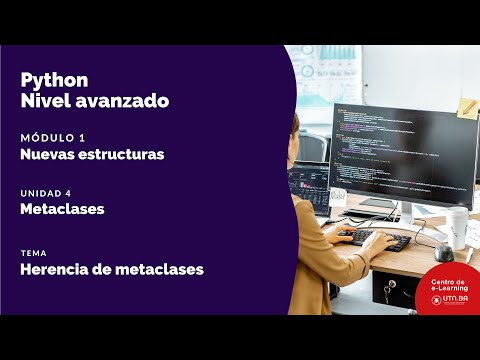

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('sHNstppqli8' , width=700, height=300)


In [9]:
class Control(type):
    estado= "Inspección"

class ControlMotor(Control):
    encendido=False

    def recuperar_hora(cls):
        return "hora del evento"


class Material:
    material = "plástico"
    

class Auto(Material, metaclass=ControlMotor):
    marca="toyota"

    def __init__(self, color):
        self.color = color

    def retornar_color(self, valor):
        return self.color + str(valor)

print("----desde la clase----")
print(Auto.encendido)
print(Auto.recuperar_hora())

obj = Auto("rojo")

print("---Desde la instancia de la clase---")

try:
    print(obj.encendido)
except:
    print("la instancia de la clase no puede acceder al atributo de su clase madre")


try:
    print(obj.recuperar_hora())
except:
    print("la instancia de la clase no puede acceder al método de su clase madre")


print(Auto.estado)



----desde la clase----
False
hora del evento
---Desde la instancia de la clase---
la instancia de la clase no puede acceder al atributo de su clase madre
la instancia de la clase no puede acceder al método de su clase madre
Inspección


## Sobrecarga de metaclases

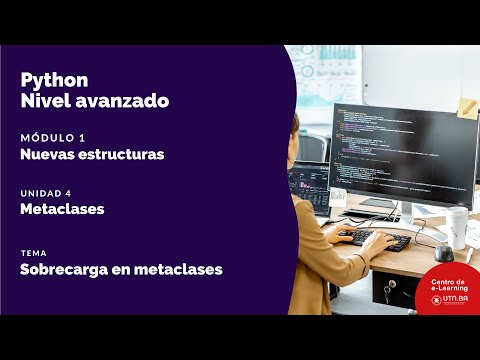

In [5]:


from IPython.display import YouTubeVideo

YouTubeVideo('C83kz5wiFTM' , width=700, height=300)


In [13]:

class ControlMotor(type):
    def __getitem__(cls, indice):
        return cls.color[indice]*5

class Auto(metaclass=ControlMotor):
    color="azul"

    def __getitem__(self, indice):
        return indice**0.5
        
obj=Auto()
print(obj[64])

print(Auto[1])
print(obj[1])


8.0
zzzzz
1.0


### Explicación de GPT4

This code snippet demonstrates the use of metaclasses and special methods in Python. Let's break it down:

### The `ControlMotor` Metaclass

- `ControlMotor` is a metaclass. A metaclass in Python is a class of a class that defines how a class behaves. A class is an instance of its metaclass.

- The `__getitem__` method is a special method in Python used to access items using square bracket notation, like `obj[key]`. In the `ControlMotor` metaclass, this method is defined to access the `color` attribute of the class and return its character at the specified `indice` multiplied by 5.

### The `Auto` Class

- `Auto` is a class that uses `ControlMotor` as its metaclass. This is specified by `metaclass=ControlMotor` in the class definition.

- The `Auto` class has a class attribute `color` set to the string `"azul"`.

- It also defines its own `__getitem__` method, which overrides the behavior provided by the metaclass for instances of `Auto`. This method returns the square root of the `indice`.

### Working of the Code

1. `obj=Auto()`: An instance of `Auto` named `obj` is created.

2. `print(obj[64])`: The `__getitem__` method of the `Auto` instance is called with `64`. This returns the square root of `64`, which is `8.0`.

3. `print(Auto[1])`: Here, the `__getitem__` method of the `ControlMotor` metaclass is called, because we are accessing the class `Auto` itself, not an instance. It returns the first character of the string `"azul"` (which is `'a'`) multiplied by 5, resulting in `'aaaaa'`.

4. `print(obj[1])`: Again, the instance's `__getitem__` method is called, this time with `1`. This returns the square root of `1`, which is `1.0`.

In summary, this code demonstrates how Python classes can use metaclasses to define behavior at the class level, and how instances of these classes can have different behavior for the same operator (`[]` in this case) based on whether the operator is applied to the class or an instance.